<a href="https://colab.research.google.com/github/MRazin172/Reinforcement-Learning/blob/main/2348534_RL_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax


Define a simple 1D grid-world environment

In [3]:
class GridWorld:
    def __init__(self, size, goal):
        self.size = size
        self.goal = goal

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        if action == 0:  # Move left
            self.state = max(0, self.state - 1)
        elif action == 1:  # Move right
            self.state = min(self.size - 1, self.state + 1)

        reward = 1 if self.state == self.goal else 0
        done = self.state == self.goal
        return self.state, reward, done

Policy Network (Logits -> Softmax -> Action Probabilities)


In [4]:
def policy(state, weights):
    logits = weights[state]
    probs = softmax(logits)
    action = np.random.choice(len(probs), p=probs)
    return action, probs

 Generate an episode

In [6]:
def generate_episode(env, weights):
    state = env.reset()
    episode = []
    done = False

    while not done:
        action, probs = policy(state, weights)
        next_state, reward, done = env.step(action)
        episode.append((state, action, reward))
        state = next_state

    return episode


In [7]:
def compute_returns(episode, gamma):
    returns = []
    G = 0
    for _, _, reward in reversed(episode):
        G = reward + gamma * G
        returns.insert(0, G)
    return returns

In [8]:
def update_policy(episode, returns, weights, alpha):
    for (state, action, _), G in zip(episode, returns):
        logits = weights[state]
        probs = softmax(logits)
        gradient = -probs
        gradient[action] += 1
        weights[state] += alpha * G * gradient


Parameters

In [9]:
env = GridWorld(size=5, goal=4)
states = env.size
actions = 2
gamma = 0.99
alpha = 0.1
episodes = 1000

# Initialize weights
weights = np.zeros((states, actions))

total_rewards = []

# Train the agent
for episode in range(episodes):
    ep = generate_episode(env, weights)
    returns = compute_returns(ep, gamma)
    update_policy(ep, returns, weights, alpha)
    total_rewards.append(sum([reward for _, _, reward in ep]))

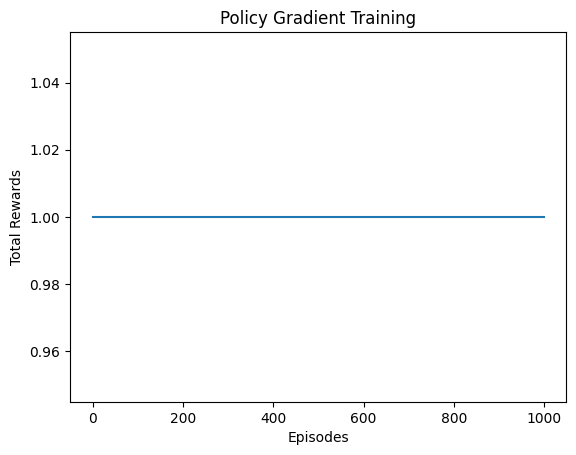

Trained policy weights:
[[-1.58843311  1.58843311]
 [-1.89685214  1.89685214]
 [-1.43431146  1.43431146]
 [-1.97543037  1.97543037]
 [ 0.          0.        ]]


In [10]:
# Plot total rewards
plt.plot(total_rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Rewards')
plt.title('Policy Gradient Training')
plt.show()

print("Trained policy weights:")
print(weights)
